# Brent Crude Oil Pairs Trade: USO and XLE

In [150]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib as mpl
from matplotlib import pyplot as plt

In [151]:
XLE = pd.read_csv(r'/Users/brodyuehara/Desktop/XLE.csv')
USO = pd.read_csv(r'/Users/brodyuehara/Desktop/USO.csv')

In [161]:
XLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [162]:
USO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


Text(0, 0.5, 'Closing Price (USD)')

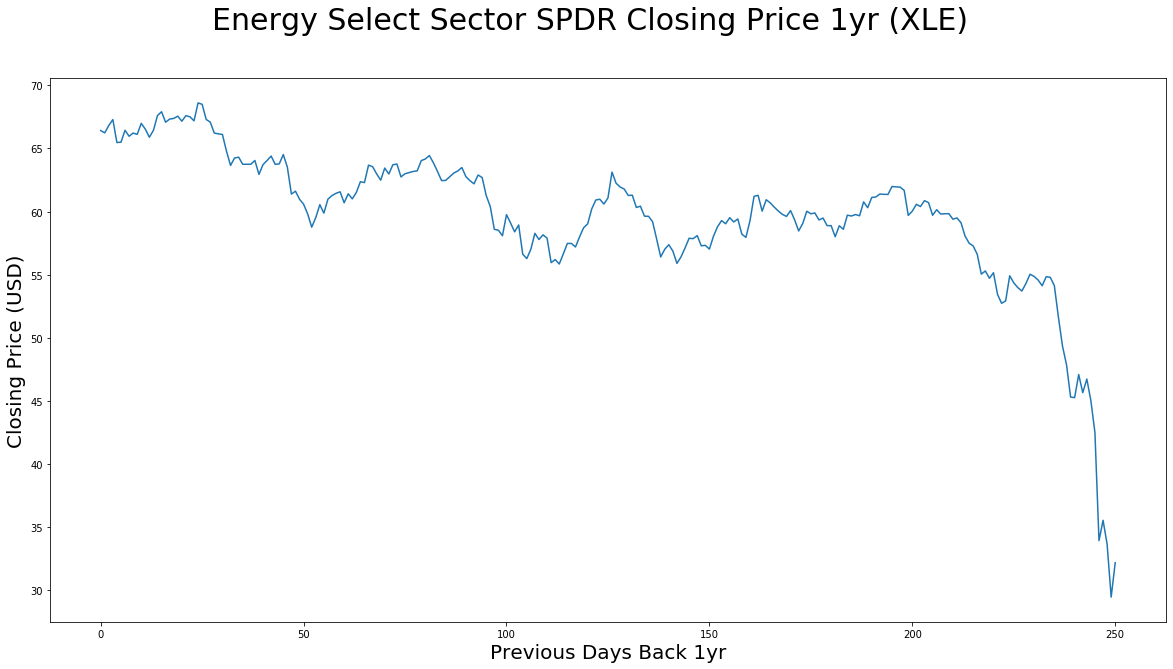

In [154]:
fig = plt.figure(figsize=(20, 10))
plt.plot(XLE.Close)
fig.suptitle('Energy Select Sector SPDR Closing Price 1yr (XLE)', fontsize=30)
plt.xlabel('Previous Days Back 1yr', fontsize=20)
plt.ylabel('Closing Price (USD)', fontsize=20)
#fig.savefig('XLEClosing.jpg') #used to save plot as jpg 

Text(0, 0.5, 'Closing Price (USD)')

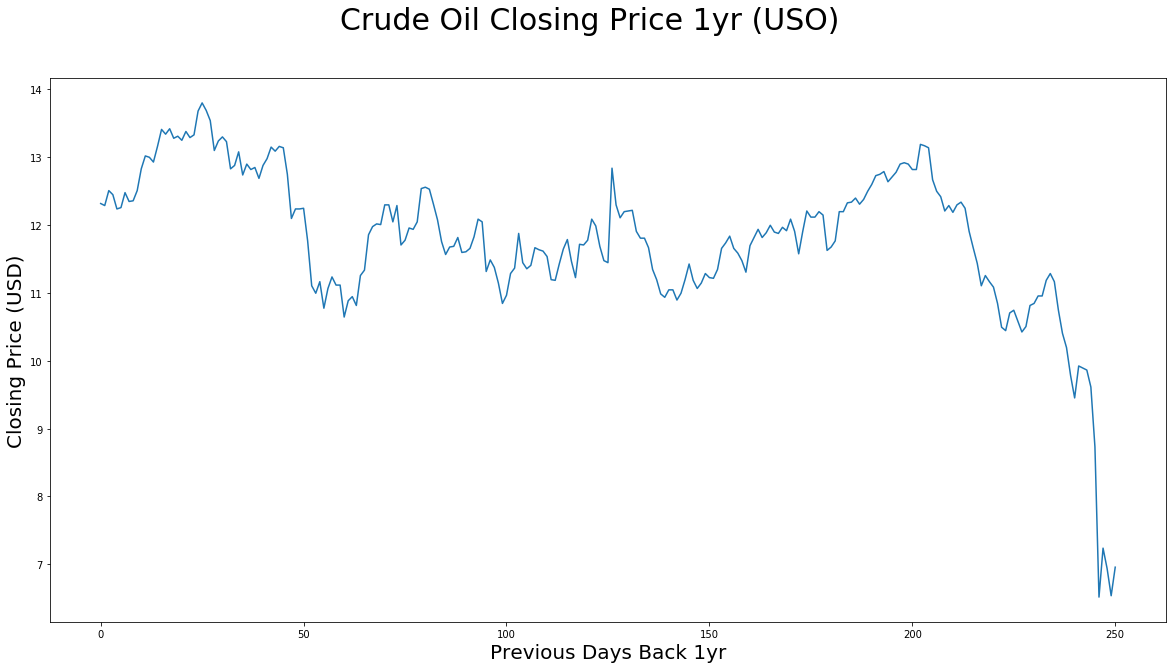

In [155]:
fig = plt.figure(figsize=(20, 10))
plt.plot(USO.Close)
fig.suptitle('Crude Oil Closing Price 1yr (USO)', fontsize=30)
plt.xlabel('Previous Days Back 1yr', fontsize=20)
plt.ylabel('Closing Price (USD)', fontsize=20)
#fig.savefig('USOClosing.jpg') #used to save plot as jpg 

In [156]:
Y = XLE.Close
X = USO.Close

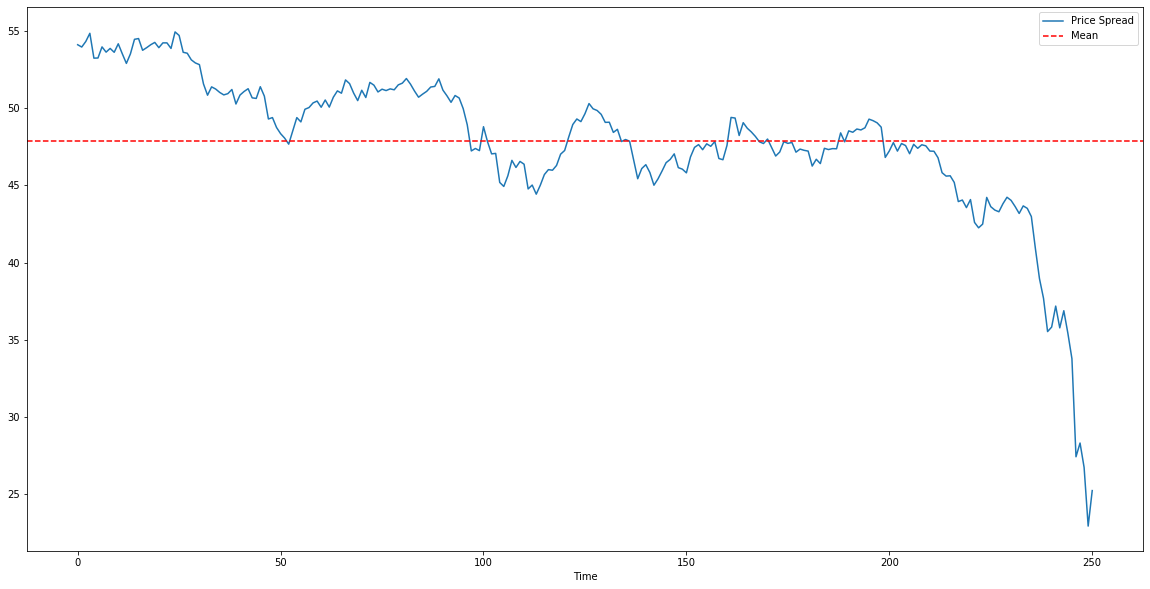

In [157]:
(Y - X).plot(figsize=(20, 10)) # Plot the spread
plt.axhline((Y - X).mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.legend(['Price Spread', 'Mean']);
plt.show()

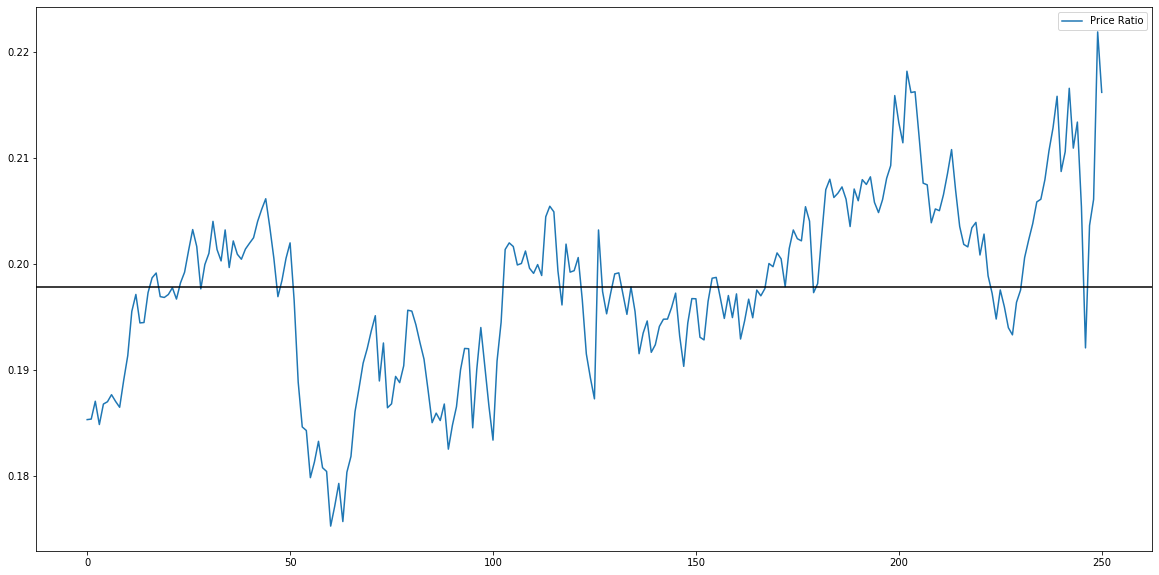

In [158]:
ratio = X/Y
ratio.plot(figsize=(20,10))
plt.axhline(ratio.mean(), color='black')
plt.legend(['Price Ratio']);

In [159]:
#Testing for Cointegration
score, pvalue, _ = coint(X, Y)
print('Cointegration p-value statistic: ', pvalue)

Cointegration p-value statistic:  0.04497806000539222


In [160]:
print('Correlation: ', X.corr(Y))

Correlation:  0.9058798787591374


### Results:

#### Our correlation p-value statistic (0.04) is less than 0.05. Therefore, we can assume that XLE and USO are cointegrated. 